In [2]:
# importting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')
#https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

In [4]:
# loading and reading dataset
import pandas as pd
df = pd.read_csv("winequality-red.csv")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [6]:
#data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# describing the data
df.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [12]:
#column to list 
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [79]:

# Check for missing values in each column
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
citric acid                         0
density                             0
pH                                  0
quality                             0
fixed acidity_transformed           0
volatile acidity_transformed        0
residual sugar_transformed          0
chlorides_transformed               0
free sulfur dioxide_transformed     0
total sulfur dioxide_transformed    0
sulphates_transformed               0
alcohol_transformed                 0
dtype: int64


In [81]:
# Check unique values in each column
print("\nUnique Values:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values:
citric acid: 80 unique values
density: 436 unique values
pH: 89 unique values
quality: 6 unique values
fixed acidity_transformed: 96 unique values
volatile acidity_transformed: 143 unique values
residual sugar_transformed: 91 unique values
chlorides_transformed: 153 unique values
free sulfur dioxide_transformed: 60 unique values
total sulfur dioxide_transformed: 144 unique values
sulphates_transformed: 96 unique values
alcohol_transformed: 65 unique values


In [14]:
#checking duplicate values 
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [ ]:
#Replace Missing Categorical Data with the Mode
# Identify categorical columns (assuming object/string columns are categorical)
categorical_columns = df.select_dtypes(include=['object']).columns

# Replace missing categorical values with the mode
for col in categorical_columns:
    mode_value = df[col].mode()[0]  # Calculate the mode
    df[col].fillna(mode_value, inplace=True)  # Replace missing values with the mode

# Verify no missing values remain in categorical columns
print("\nMissing Values in Categorical Columns After Imputation:")
print(df[categorical_columns].isnull().sum())

In [ ]:
## Identify continuous columns (assuming numeric columns are continuous)
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Replace missing continuous values with the median
for col in continuous_columns:
    median_value = df[col].median()  # Calculate the median
    df[col].fillna(median_value, inplace=True)  # Replace missing values with the median

# Verify no missing values remain in continuous columns
print("\nMissing Values in Continuous Columns After Imputation:")
print(df[continuous_columns].isnull().sum())

# Identify continuous columns (assuming numeric columns are continuous)
continuous_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Replace missing continuous values with the median
for col in continuous_columns:
    median_value = df[col].median()  # Calculate the median
    df[col].fillna(median_value, inplace=True)  # Replace missing values with the median

# Verify no missing values remain in continuous columns
print("\nMissing Values in Continuous Columns After Imputation:")
print(df[continuous_columns].isnull().sum())

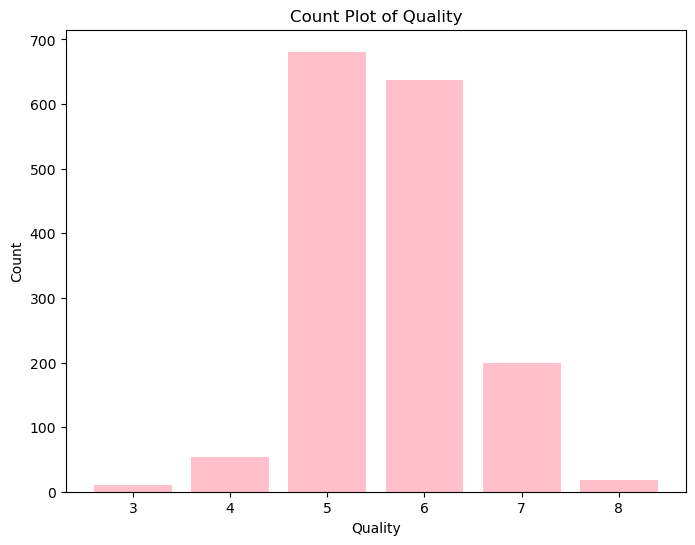

In [31]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
quality_counts = df['quality'].value_counts()

# Using Matplotlib to create a count plot
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts, color='pink')  # Replace 'darkpink' with 'pink'
plt.title('Count Plot of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


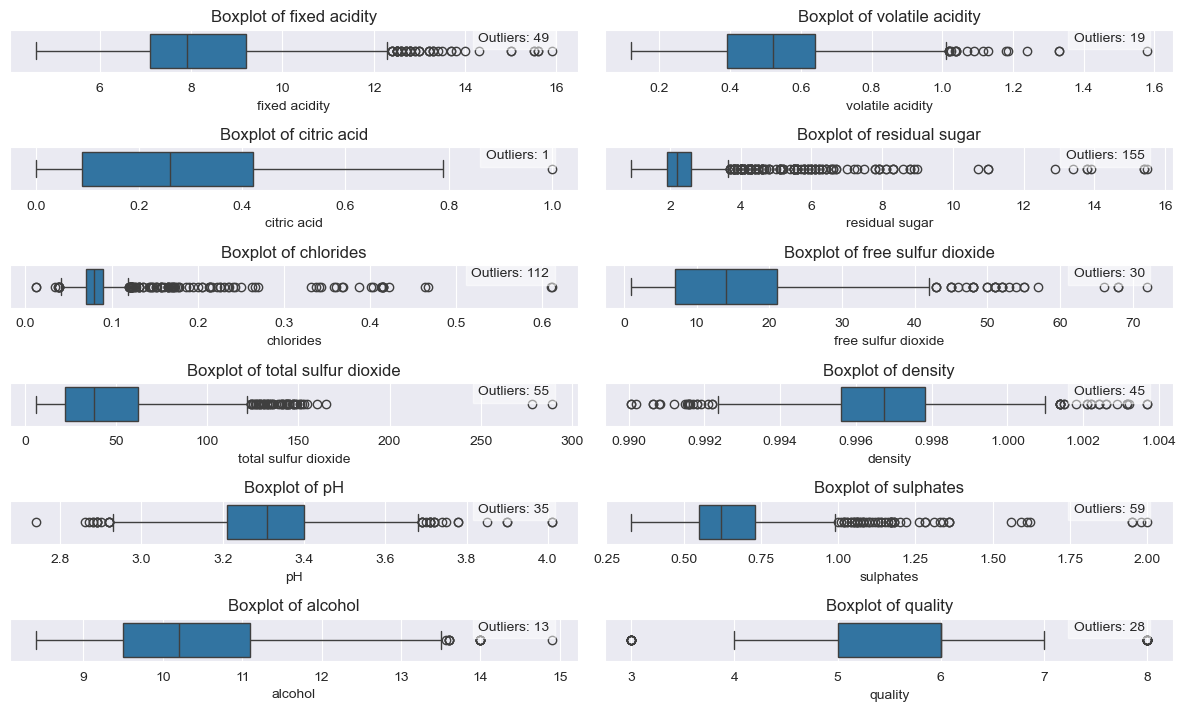

In [16]:
#plot the box whiskers diagram for the transformd variablesimport pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
#df = pd.read_csv('your_dataset.csv')  # Replace with your dataset file path

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for each numerical variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//2 + 1, 2, i)  # Adjust subplot layout
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    
    # Calculate number of outliers using IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    num_outliers = len(outliers)
    
    # Annotate the plot with the number of outliers
    plt.text(0.95, 0.95, f'Outliers: {num_outliers}', 
             transform=plt.gca().transAxes, fontsize=10, 
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

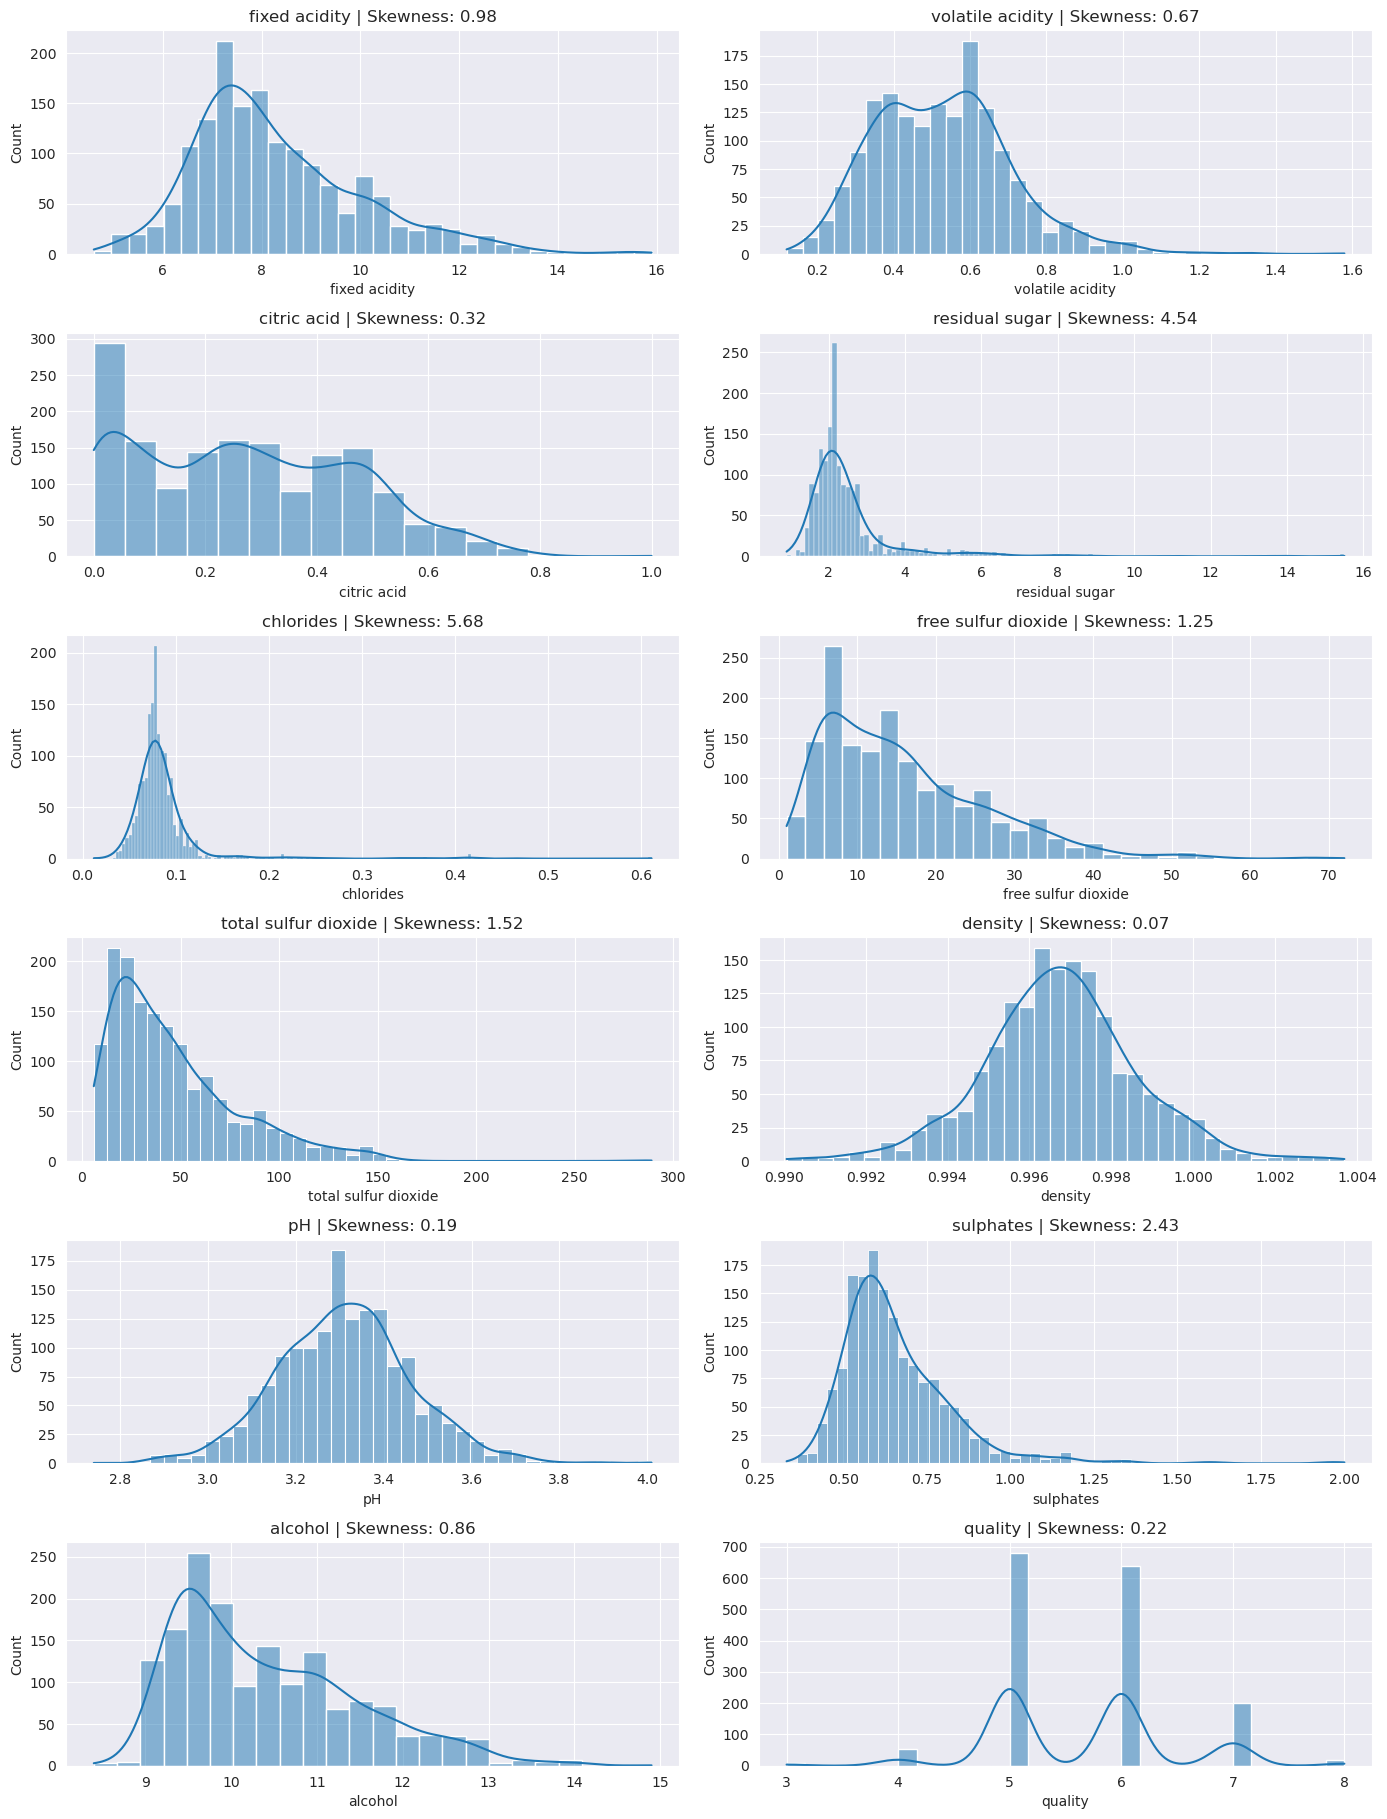

In [41]:
# plot the histograms and check skewness values
# Set Seaborn style
import seaborn as sns
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

Features to be log-transformed due to high skewness: ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']


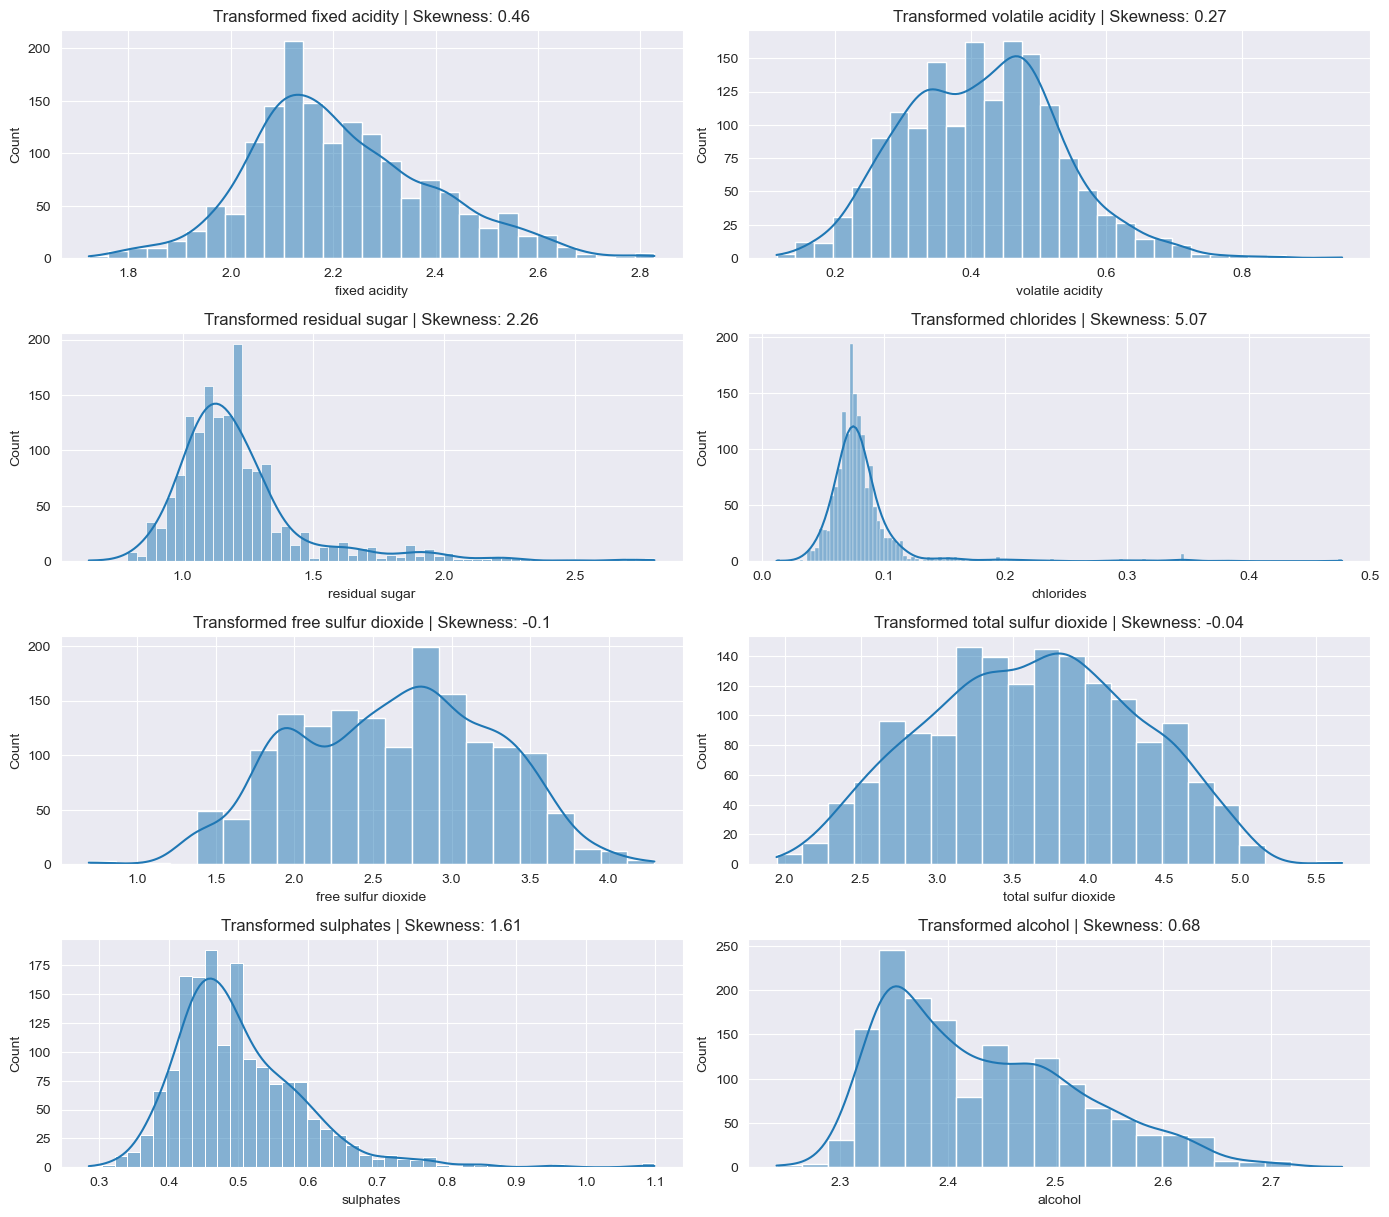

In [20]:
# log transforming variables with high skweness .i.e.> 0.5
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Create a copy of the original DataFrame to store transformed values
df_transformed = df.copy()

# Identify highly skewed variables (skewness > 0.5 or skewness < -0.5)
skewed_features = [feature for feature in numerical_columns if abs(df[feature].skew()) > 0.5]

print(f"Features to be log-transformed due to high skewness: {skewed_features}")

# Plot original distributions
#plt.figure(figsize=(14, len(skewed_features) * 3))
#for idx, feature in enumerate(skewed_features, 1):
  #  plt.subplot(len(skewed_features), 2, idx)
   # sns.histplot(df[feature], kde=True)
    #original_skewness = df[feature].skew()
   # plt.title(f"Original {feature} | Skewness: {round(original_skewness, 2)}")

#plt.tight_layout()
#plt.show()

# Apply log transformation for highly skewed features
for feature in skewed_features:
    df_transformed[feature] = np.log1p(df[feature])  # log1p avoids log(0) errors

# Plot transformed distributions
plt.figure(figsize=(14, len(skewed_features) * 3))
for idx, feature in enumerate(skewed_features, 1):
    plt.subplot(len(skewed_features), 2, idx)
    sns.histplot(df_transformed[feature], kde=True)
    new_skewness = df_transformed[feature].skew()
    plt.title(f"Transformed {feature} | Skewness: {round(new_skewness, 2)}")

plt.tight_layout()
plt.show()


Features to be transformed using Yeo-Johnson due to high skewness: ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']


<Figure size 640x480 with 0 Axes>

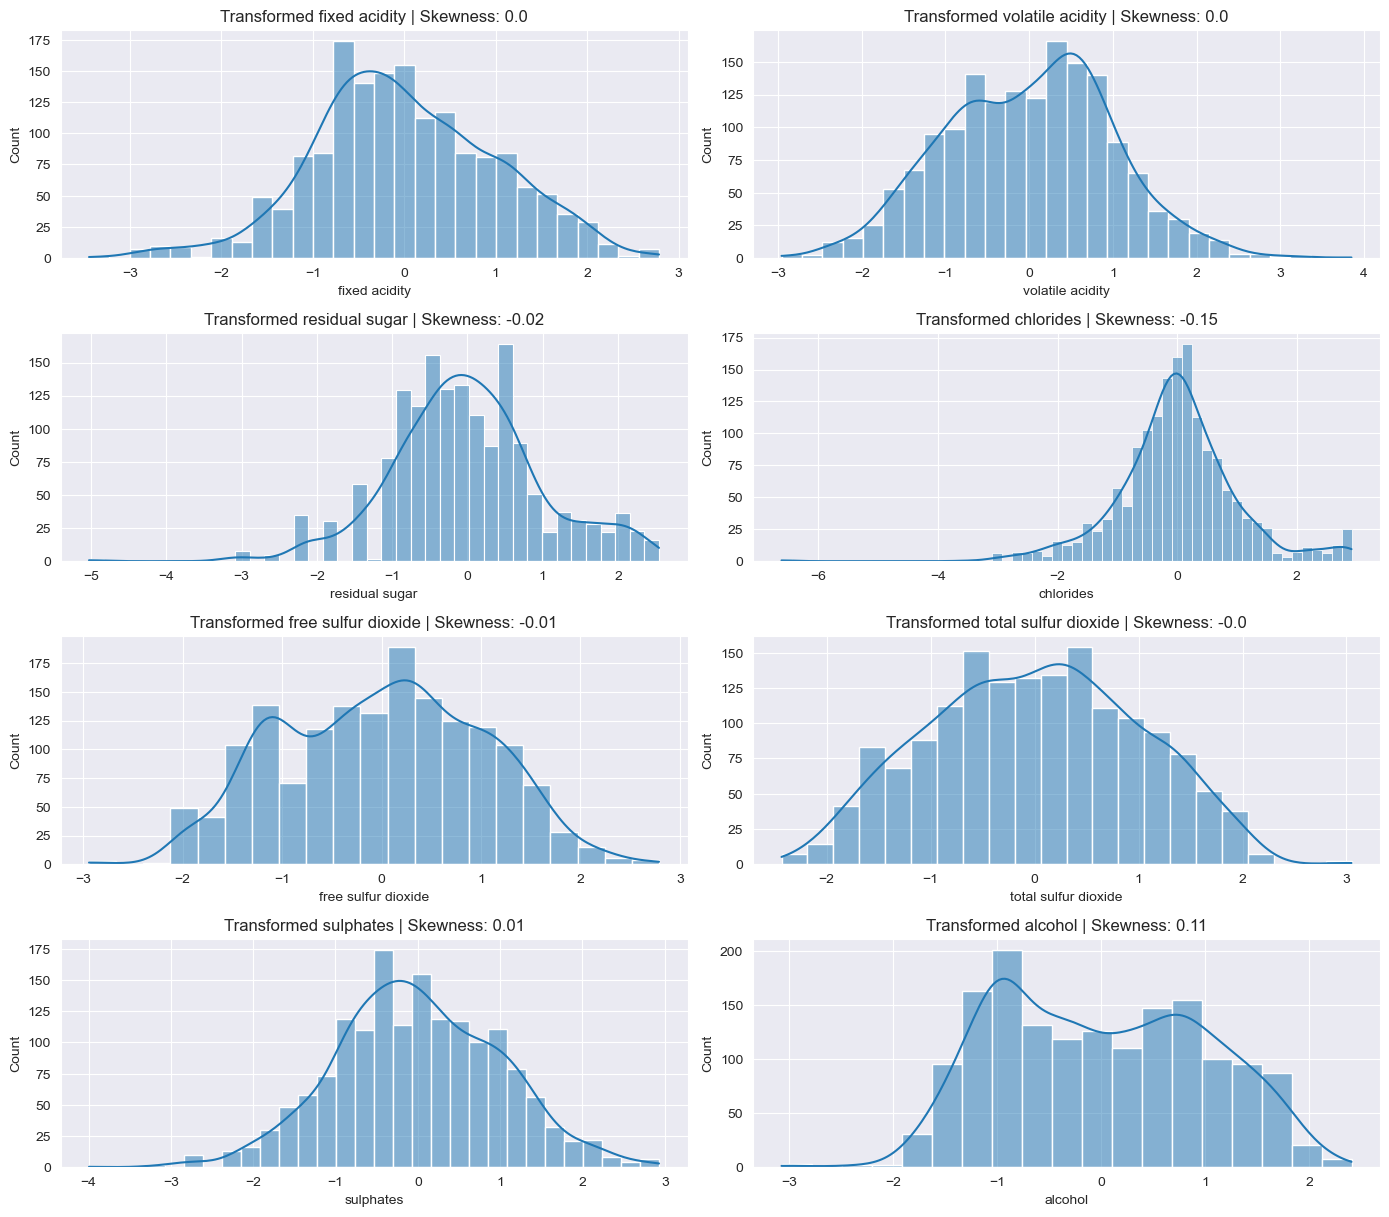

In [28]:
# doing a Yeo-Johnson transformation on variables with high skewness .i.e.> 0.5 or <-0.5
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PowerTransformer  # For Yeo-Johnson transformation

# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Create a copy of the original DataFrame to store transformed values
df_transformed_2 = df.copy()

# Identify highly skewed variables (skewness > 0.5 or skewness < -0.5)
skewed_features = [feature for feature in numerical_columns if abs(df[feature].skew()) > 0.5]

print(f"Features to be transformed using Yeo-Johnson due to high skewness: {skewed_features}")

# Plot original distributions
#plt.figure(figsize=(14, len(skewed_features) * 3))
#for idx, feature in enumerate(skewed_features, 1):
#  plt.subplot(len(skewed_features), 2, idx)
#   sns.histplot(df[feature], kde=True)
#   original_skewness = df[feature].skew()
#    plt.title(f"Original {feature} | Skewness: {round(original_skewness, 2)}")

plt.tight_layout()
plt.show()

# Apply Yeo-Johnson transformation for highly skewed features
pt = PowerTransformer(method='yeo-johnson')  # Yeo-Johnson works for both positive and negative values
df_transformed[skewed_features] = pt.fit_transform(df[skewed_features])

# Convert transformed data back to DataFrame
df_transformed[skewed_features] = pd.DataFrame(df_transformed[skewed_features], columns=skewed_features)

# Plot transformed distributions
plt.figure(figsize=(14, len(skewed_features) * 3))
for idx, feature in enumerate(skewed_features, 1):
    plt.subplot(len(skewed_features), 2, idx)
    sns.histplot(df_transformed[feature], kde=True)
    new_skewness = df_transformed[feature].skew()
    plt.title(f"Transformed {feature} | Skewness: {round(new_skewness, 2)}")

plt.tight_layout()
plt.show()


Features to be transformed using Yeo-Johnson due to high skewness: ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']


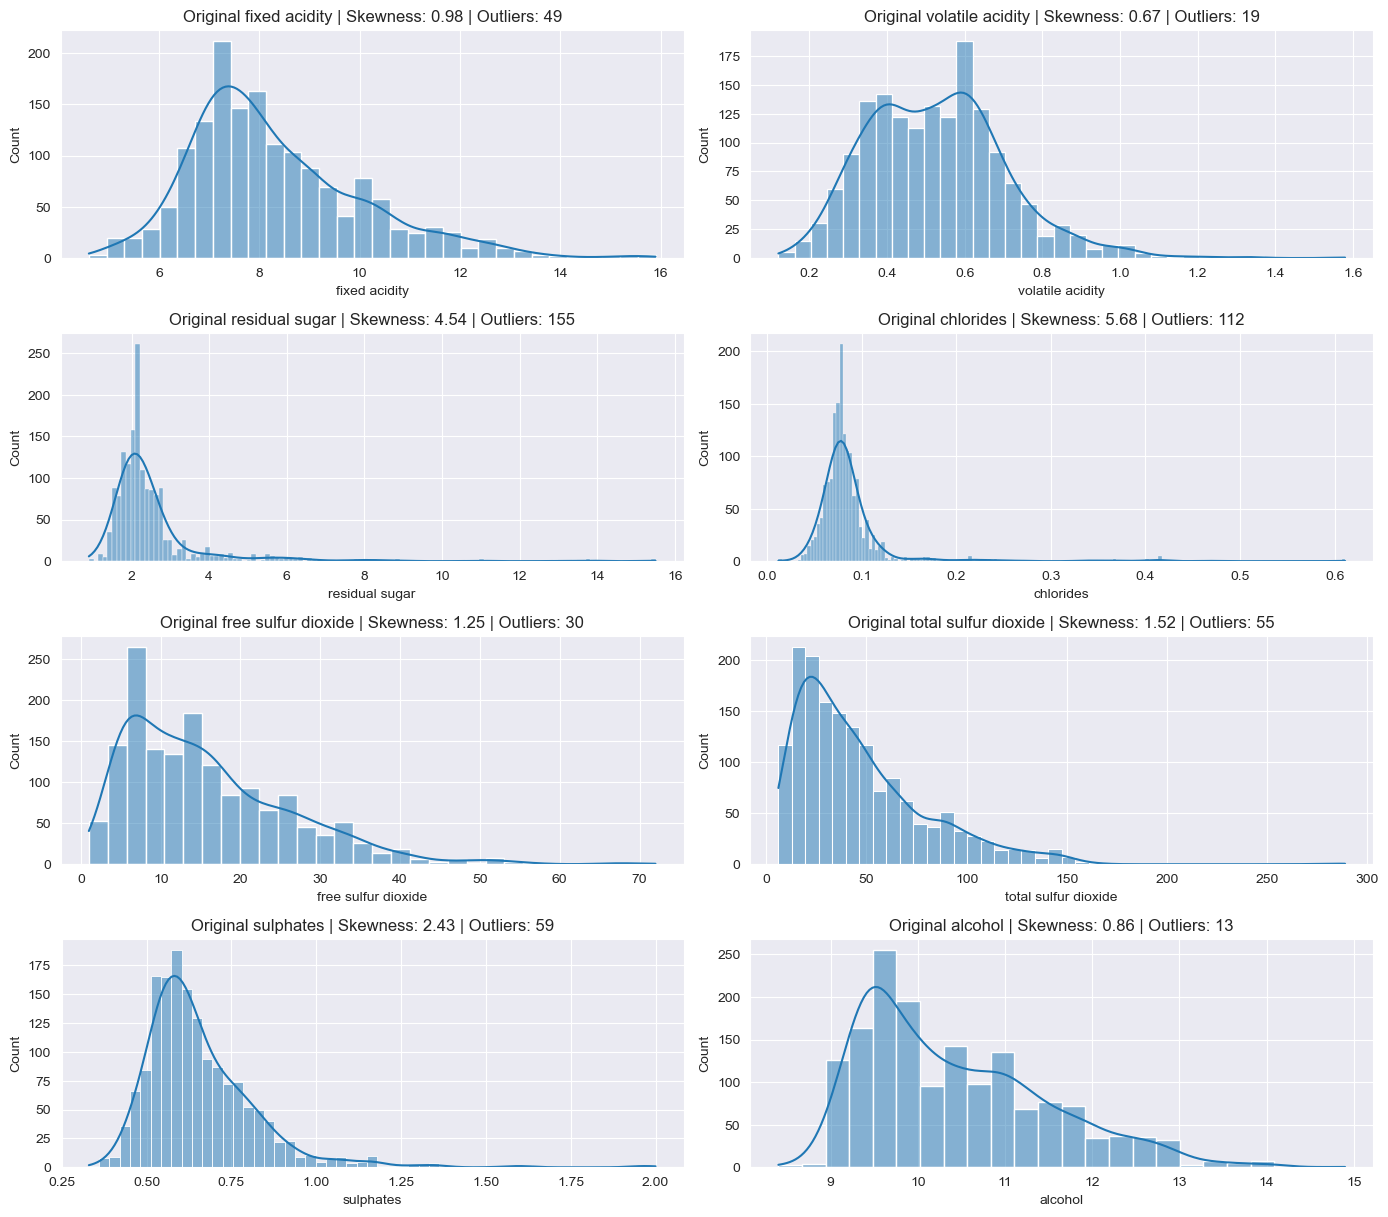

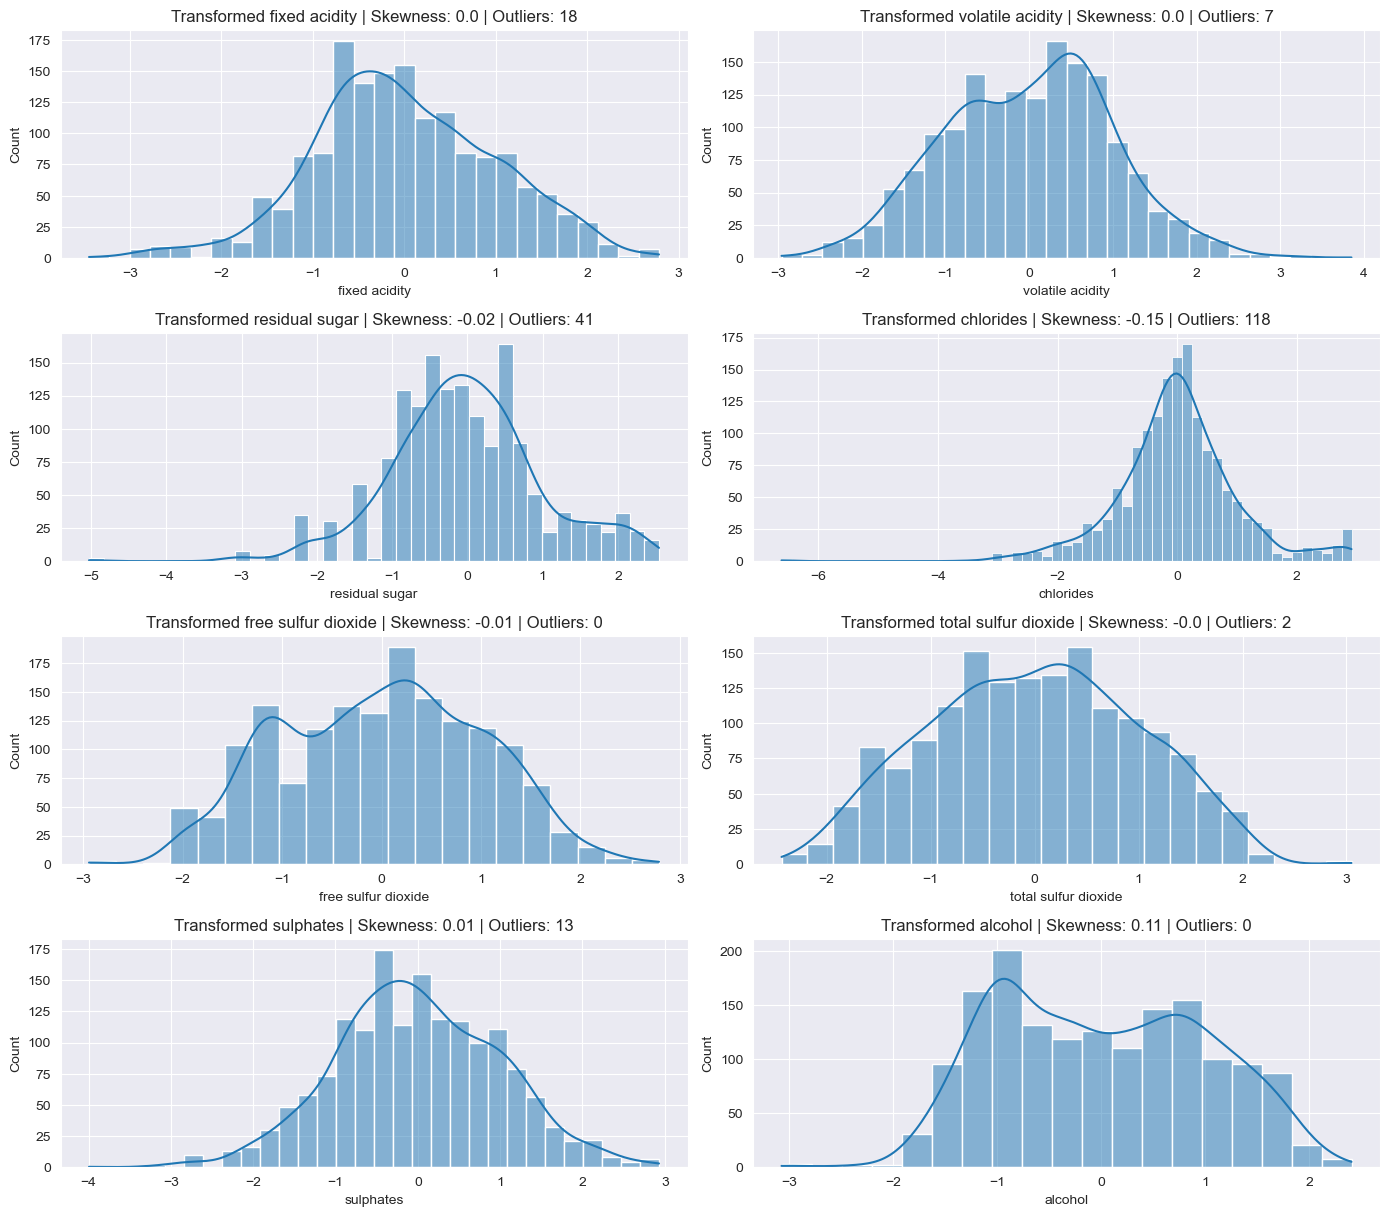


Comparison of Outliers Before and After Transformation:
fixed acidity:
  - Before Transformation: 49 outliers
  - After Transformation: 18 outliers
  - Change: -31 outliers
volatile acidity:
  - Before Transformation: 19 outliers
  - After Transformation: 7 outliers
  - Change: -12 outliers
residual sugar:
  - Before Transformation: 155 outliers
  - After Transformation: 41 outliers
  - Change: -114 outliers
chlorides:
  - Before Transformation: 112 outliers
  - After Transformation: 118 outliers
  - Change: 6 outliers
free sulfur dioxide:
  - Before Transformation: 30 outliers
  - After Transformation: 0 outliers
  - Change: -30 outliers
total sulfur dioxide:
  - Before Transformation: 55 outliers
  - After Transformation: 2 outliers
  - Change: -53 outliers
sulphates:
  - Before Transformation: 59 outliers
  - After Transformation: 13 outliers
  - Change: -46 outliers
alcohol:
  - Before Transformation: 13 outliers
  - After Transformation: 0 outliers
  - Change: -13 outliers


In [46]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PowerTransformer  # For Yeo-Johnson transformation

# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Create a copy of the original DataFrame to store transformed values
df_transformed = df.copy()

# Identify highly skewed variables (skewness > 0.5 or skewness < -0.5)
skewed_features = [feature for feature in numerical_columns if abs(df[feature].skew()) > 0.5]

print(f"Features to be transformed using Yeo-Johnson due to high skewness: {skewed_features}")

# Function to calculate number of outliers using IQR
def calculate_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

# Store number of outliers before and after transformation
outliers_before = {}
outliers_after = {}

# Plot original distributions and calculate outliers
plt.figure(figsize=(14, len(skewed_features) * 3))
for idx, feature in enumerate(skewed_features, 1):
    plt.subplot(len(skewed_features), 2, idx)
    sns.histplot(df[feature], kde=True)
    original_skewness = df[feature].skew()
    num_outliers_before = calculate_outliers(df[feature])
    outliers_before[feature] = num_outliers_before
    plt.title(f"Original {feature} | Skewness: {round(original_skewness, 2)} | Outliers: {num_outliers_before}")

plt.tight_layout()
plt.show()

# Apply Yeo-Johnson transformation for highly skewed features
pt = PowerTransformer(method='yeo-johnson')  # Yeo-Johnson works for both positive and negative values
df_transformed[skewed_features] = pt.fit_transform(df[skewed_features])

# Convert transformed data back to DataFrame
df_transformed[skewed_features] = pd.DataFrame(df_transformed[skewed_features], columns=skewed_features)

# Plot transformed distributions and calculate outliers
plt.figure(figsize=(14, len(skewed_features) * 3))
for idx, feature in enumerate(skewed_features, 1):
    plt.subplot(len(skewed_features), 2, idx)
    sns.histplot(df_transformed[feature], kde=True)
    
    # Calculate skewness after transformation
    new_skewness = df_transformed[feature].skew()
    
    # Calculate number of outliers after transformation
    num_outliers_after = calculate_outliers(df_transformed[feature])
    outliers_after[feature] = num_outliers_after
    
    # Add title with skewness and number of outliers
    plt.title(f"Transformed {feature} | Skewness: {round(new_skewness, 2)} | Outliers: {num_outliers_after}")

plt.tight_layout()
plt.show()

# Print comparison of outliers before and after transformation
print("\nComparison of Outliers Before and After Transformation:")
for feature in skewed_features:
    print(f"{feature}:")
    print(f"  - Before Transformation: {outliers_before[feature]} outliers")
    print(f"  - After Transformation: {outliers_after[feature]} outliers")
    print(f"  - Change: {outliers_after[feature] - outliers_before[feature]} outliers")

In [24]:
# loading and reading dataset
import pandas as pd
df1 = pd.read_csv("winequality-red.csv")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

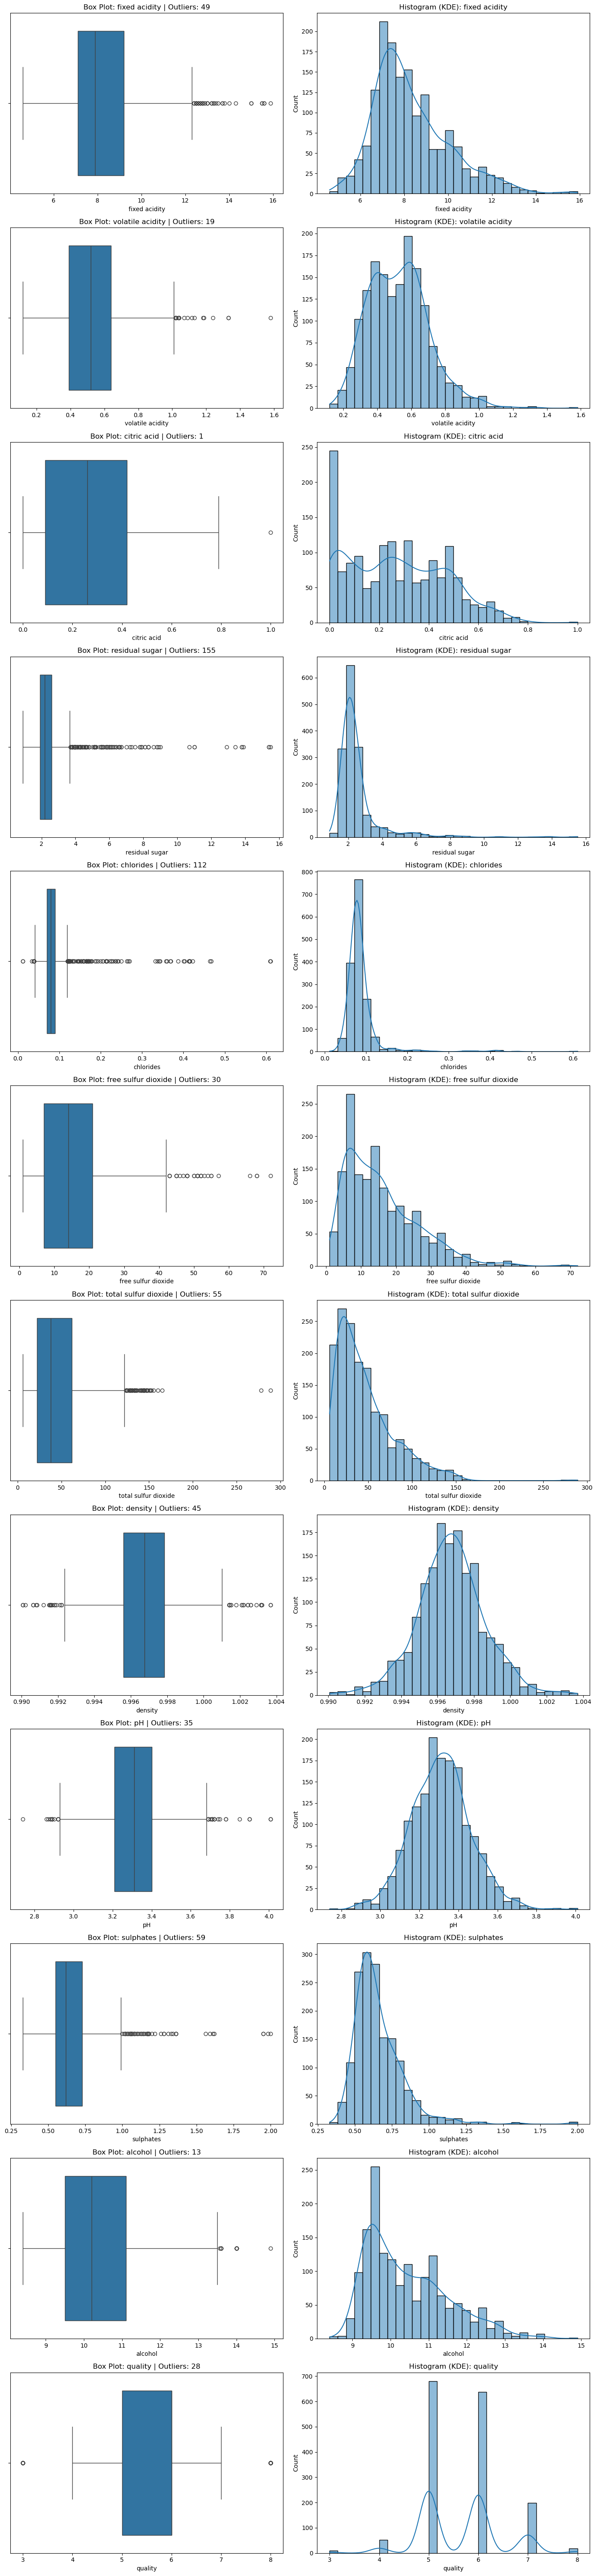

In [8]:
# EDA plotting the box -whisker diagram and the histogram for each variable 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'df' with your actual DataFrame)
#df = pd.read_csv("winequality-red.csv")   #mydataset  # Assuming 'mydataset' is already loaded

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Create a figure for plots
plt.figure(figsize=(14, len(numerical_columns) * 5))

# Dictionary to store outlier counts
outlier_counts = {}

# Loop through each numerical feature
for idx, feature in enumerate(numerical_columns, 1):
    
    # Compute IQR for Outlier Detection
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the number of outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_counts[feature] = len(outliers)
    
    # Create a subplot with two graphs (Boxplot & Histogram)
    plt.subplot(len(numerical_columns), 2, 2 * idx - 1)
    sns.boxplot(x=df[feature])
    plt.title(f"Box Plot: {feature} | Outliers: {len(outliers)}")

    plt.subplot(len(numerical_columns), 2, 2 * idx)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Histogram (KDE): {feature}")

# Adjust layout
plt.tight_layout()
plt.show()

# Print the number of outliers in each numerical column
#print("\nOutlier Summary:")
#for feature, count in outlier_counts.items():
  #  print(f"{feature}: {count} outliers")


In [18]:
#create a new datset by saving new transformed values and the old ones 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set Seaborn style
sns.set_style("darkgrid")

# Sample dataset (Replace this with your actual dataset)
# df = pd.read_csv("your_dataset.csv")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Identify highly skewed variables (skewness > 0.5 or skewness < -0.5)
skewed_features = [feature for feature in numerical_columns if abs(df[feature].skew()) > 0.5]

print(f"Features to be log-transformed due to high skewness: {skewed_features}")

# Create a new dataset that includes original columns
df_final = df.copy()

# Apply log transformation for highly skewed features and create new columns
for feature in skewed_features:
    df_final[f"{feature}_log"] = np.log1p(df[feature])  # log1p avoids log(0) errors

# Display the first few rows of the new dataset
df_final.head()



Features to be log-transformed due to high skewness: ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fixed acidity_log,volatile acidity_log,residual sugar_log,chlorides_log,free sulfur dioxide_log,total sulfur dioxide_log,sulphates_log,alcohol_log
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2.128232,0.530628,1.064711,0.073250,2.484907,3.555348,0.444686,2.341806
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2.174752,0.631272,1.280934,0.093490,3.258097,4.219508,0.518794,2.379546
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2.174752,0.565314,1.193922,0.088011,2.772589,4.007333,0.500775,2.379546
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2.501436,0.246860,1.064711,0.072321,2.890372,4.110874,0.457425,2.379546
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2.128232,0.530628,1.064711,0.073250,2.484907,3.555348,0.444686,2.341806


In [50]:
#create a new dataset that includes the log transformed values and those not transformed. 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PowerTransformer  # For Yeo-Johnson transformation

# Set Seaborn style
sns.set_style("darkgrid")

# Sample dataset (Replace this with your actual dataset)
# df = pd.read_csv("your_dataset.csv")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Identify highly skewed variables (skewness > 0.5 or skewness < -0.5)
skewed_features = [feature for feature in numerical_columns if abs(df[feature].skew()) > 0.5]

print(f"Features to be Yeo-Johnson transformed due to high skewness: {skewed_features}")

# Create a new dataset that will contain only transformed and unchanged features
df_final = df.copy()

# Apply Yeo-Johnson transformation and rename transformed columns
pt = PowerTransformer(method='yeo-johnson')  # Works for both positive and negative values
transformed_data = pt.fit_transform(df[skewed_features])

# Store transformed values in new columns with "_transformed" suffix
for i, feature in enumerate(skewed_features):
    df_final[f"{feature}_transformed"] = transformed_data[:, i]

# Drop original skewed features, keeping only the transformed versions
df_final.drop(columns=skewed_features, inplace=True)

# Display the transformed dataset
df_final.head()


Features to be Yeo-Johnson transformed due to high skewness: ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']


,citric acid,density,pH,quality,fixed acidity_transformed,volatile acidity_transformed,residual sugar_transformed,chlorides_transformed,free sulfur dioxide_transformed,total sulfur dioxide_transformed,sulphates_transformed,alcohol_transformed
0,0.00,0.9978,3.51,5,-0.442666,0.995542,-0.597145,-0.172896,-0.268045,-0.124411,-0.581650,-1.075025
1,0.00,0.9968,3.20,5,-0.161308,1.771299,0.556565,0.786204,0.993852,0.854954,0.395140,-0.500860
2,0.04,0.9970,3.26,5,-0.161308,1.269801,0.152372,0.560696,0.193450,0.540394,0.183772,-0.500860
3,0.56,0.9980,3.16,6,1.522582,-1.550050,-0.597145,-0.226113,0.385115,0.693699,-0.392318,-0.500860
4,0.00,0.9978,3.51,5,-0.442666,0.995542,-0.597145,-0.172896,-0.268045,-0.124411,-0.581650,-1.075025


In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Identify highly skewed variables (skewness > 0.5 or skewness < -0.5)
skewed_features = [feature for feature in numerical_columns if abs(df[feature].skew()) > 0.5]
print(f"Features to be Yeo-Johnson transformed: {skewed_features}")

# Apply Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
transformed_values = pt.fit_transform(df[skewed_features])

# Create a new DataFrame with transformed columns
df_transformed_2 = df.copy()# create an independnet copy of the dataframe df and assign it to df_transformed
df_transformed_2.drop(columns=skewed_features, inplace=True)  # Drop original skewed columns
df_transformed_2[[f"{feature}_transformed" for feature in skewed_features]] = transformed_values  # Add transformed ones

# Display the transformed dataset
df_transformed_2.head()


Features to be Yeo-Johnson transformed: ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']


,citric acid,density,pH,quality,fixed acidity_transformed,volatile acidity_transformed,residual sugar_transformed,chlorides_transformed,free sulfur dioxide_transformed,total sulfur dioxide_transformed,sulphates_transformed,alcohol_transformed
0,0.00,0.9978,3.51,5,-0.442666,0.995542,-0.597145,-0.172896,-0.268045,-0.124411,-0.581650,-1.075025
1,0.00,0.9968,3.20,5,-0.161308,1.771299,0.556565,0.786204,0.993852,0.854954,0.395140,-0.500860
2,0.04,0.9970,3.26,5,-0.161308,1.269801,0.152372,0.560696,0.193450,0.540394,0.183772,-0.500860
3,0.56,0.9980,3.16,6,1.522582,-1.550050,-0.597145,-0.226113,0.385115,0.693699,-0.392318,-0.500860
4,0.00,0.9978,3.51,5,-0.442666,0.995542,-0.597145,-0.172896,-0.268045,-0.124411,-0.581650,-1.075025


Enter the name of the dependent variable (target column):quality  quality


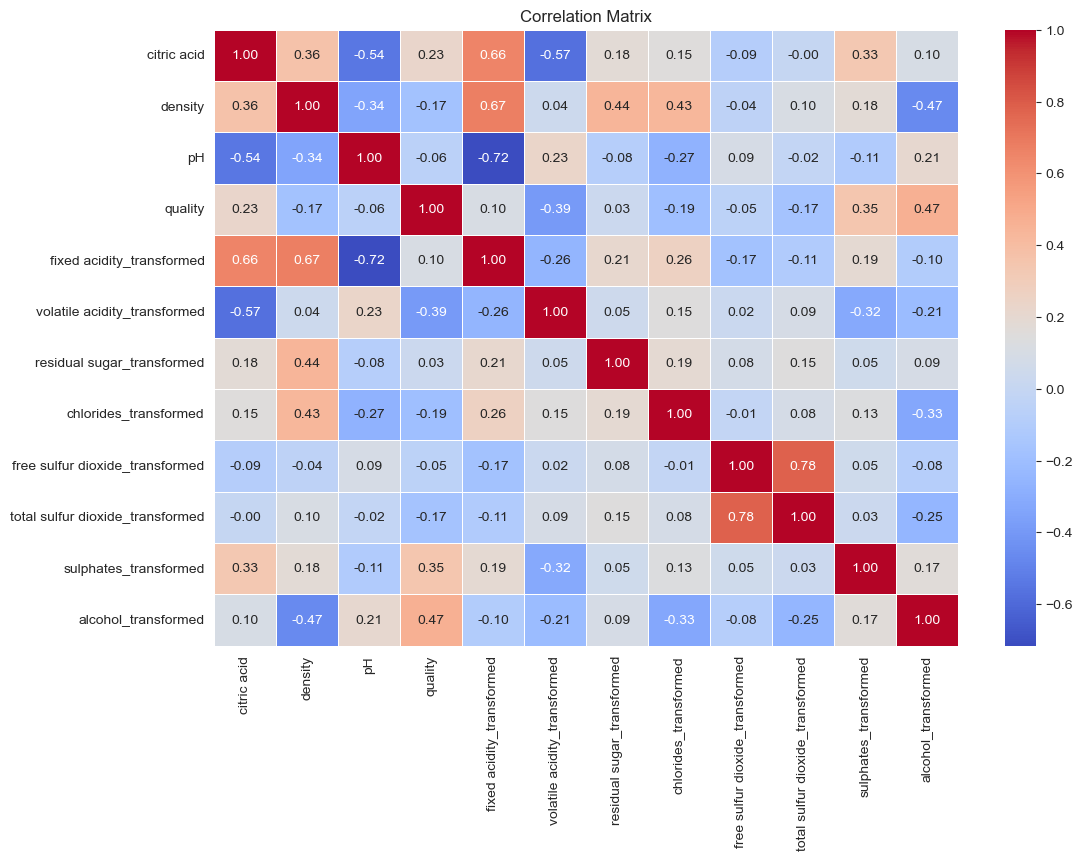


Pairs with High Correlation (|correlation| > 0.7):
fixed acidity_transformed and pH : -0.72
total sulfur dioxide_transformed and free sulfur dioxide_transformed : 0.78

Correlation of Independent Variables with quality:
citric acid : 0.23
density : -0.17
pH : -0.06
fixed acidity_transformed : 0.10
volatile acidity_transformed : -0.39
residual sugar_transformed : 0.03
chlorides_transformed : -0.19
free sulfur dioxide_transformed : -0.05
total sulfur dioxide_transformed : -0.17
sulphates_transformed : 0.35
alcohol_transformed : 0.47


In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = df_transformed_2  # Replace with your dataset file path

# Identify numerical columns (independent variables)
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Let the user specify the dependent variable (target)
dependent_variable = input("Enter the name of the dependent variable (target column):quality ") ###enter dep var 

# Ensure the dependent variable is in the dataset
if dependent_variable not in df.columns:
    raise ValueError(f"{dependent_variable} is not a valid column in the dataset.")

# Independent variables (features) are all numerical columns except the dependent variable
independent_variables = [col for col in numerical_columns if col != dependent_variable]

# Create a correlation matrix for all numerical columns (including the dependent variable)
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Identify pairs with high correlation (absolute value > 0.7)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Threshold for high correlation
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Print pairs with high correlation
print("\nPairs with High Correlation (|correlation| > 0.7):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]} : {pair[2]:.2f}")

# Print correlation of independent variables with the dependent variable
print(f"\nCorrelation of Independent Variables with {dependent_variable}:")
for col in independent_variables:
    print(f"{col} : {correlation_matrix.loc[col, dependent_variable]:.2f}")

In [107]:
#run linear regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def run_regression(dataset_path, target_variable, drop_features=None):
    """
    Loads the dataset, runs linear regression, and prints evaluation metrics.
    
    Parameters:
        dataset_path (str): Path to the CSV dataset.
        target_variable (str): Name of the dependent variable (target column).
        drop_features (list, optional): List of feature names to drop before modeling.
        
    Returns:
        model: The trained LinearRegression model.
    """
    
    # Load the dataset
    df =df_transformed_2
    
    # Optionally drop features if specified
    if drop_features:
        df = df.drop(columns=drop_features, errors='ignore')
    
    # Check if the target variable exists in the dataframe
    if target_variable not in df.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in the dataset.")

    # Select all numerical columns except the target as independent variables
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if target_variable in numeric_cols:
        numeric_cols.remove(target_variable)
    
    # Prepare features (X) and target (y)
    X = df[numeric_cols]
    y = df[target_variable]
    
    # Split data into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model's performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("=== Model Evaluation ===")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R²): {r2:.4f}\n")
    
    # Print model coefficients for each independent variable and the intercept
    print("=== Model Coefficients ===")
    for feature, coef in zip(numeric_cols, model.coef_):
        print(f"{feature}: {coef}")
    print(f"Intercept: {model.intercept_}\n")
    
    # Display the first 10 actual vs predicted values
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print("=== Actual vs Predicted Values (first 10 samples) ===")
    print(results.head(10))
    
    return model

if __name__ == "__main__":
    # Replace 'your_dataset.csv' with the actual path to your CSV file.
    dataset_path = 'your_dataset.csv'
    
    # Prompt the user to input the dependent variable (target column)
    target_variable = input("Enter the name of the dependent variable: ").strip()
    
    # Ask the user if they want to drop any features (comma separated)
    drop_features_input = input("Enter comma separated list of features to drop (if any), or press Enter to skip: ").strip()
    drop_features = [feature.strip() for feature in drop_features_input.split(',')] if drop_features_input else None
    
    # Call the function to run the regression
    run_regression(dataset_path, target_variable, drop_features)


Enter the name of the dependent variable:  quality
Enter comma separated list of features to drop (if any), or press Enter to skip:  


=== Model Evaluation ===
Mean Absolute Error (MAE): 0.4926
Mean Squared Error (MSE): 0.3837
R-squared (R²): 0.4128

=== Model Coefficients ===
citric acid: -0.3142624993555029
density: -59.90251499594543
pH: -0.18237640181262496
fixed acidity_transformed: 0.12745198791656512
volatile acidity_transformed: -0.17086525321464877
residual sugar_transformed: 0.05195407854000427
chlorides_transformed: -0.057576076043388796
free sulfur dioxide_transformed: 0.059811740779081135
total sulfur dioxide_transformed: -0.09925797303824205
sulphates_transformed: 0.19627917399820796
alcohol_transformed: 0.23548489379308263
Intercept: 66.02401320521017

=== Actual vs Predicted Values (first 10 samples) ===
      Actual  Predicted
803        6   5.392703
124        5   4.988167
350        6   5.718929
682        5   5.378788
1326       6   5.702526
976        5   5.137818
1493       5   5.190334
706        5   5.052857
613        5   5.802744
1587       6   5.687969


In [109]:
#redo by dropping var
new_drop_features_input = input("Enter comma separated list of features to drop for re-running the regression (if any), or press Enter to skip: ").strip()
new_drop_features = [feature.strip() for feature in new_drop_features_input.split(',')] if new_drop_features_input else None

# Re-run the regression analysis using the same dataset_path and target_variable from Cell 1.
model = run_regression(dataset_path, target_variable, drop_features=new_drop_features)

Enter comma separated list of features to drop for re-running the regression (if any), or press Enter to skip:  ph,residualsugar_transformed


=== Model Evaluation ===
Mean Absolute Error (MAE): 0.4926
Mean Squared Error (MSE): 0.3837
R-squared (R²): 0.4128

=== Model Coefficients ===
citric acid: -0.3142624993555029
density: -59.90251499594543
pH: -0.18237640181262496
fixed acidity_transformed: 0.12745198791656512
volatile acidity_transformed: -0.17086525321464877
residual sugar_transformed: 0.05195407854000427
chlorides_transformed: -0.057576076043388796
free sulfur dioxide_transformed: 0.059811740779081135
total sulfur dioxide_transformed: -0.09925797303824205
sulphates_transformed: 0.19627917399820796
alcohol_transformed: 0.23548489379308263
Intercept: 66.02401320521017

=== Actual vs Predicted Values (first 10 samples) ===
      Actual  Predicted
803        6   5.392703
124        5   4.988167
350        6   5.718929
682        5   5.378788
1326       6   5.702526
976        5   5.137818
1493       5   5.190334
706        5   5.052857
613        5   5.802744
1587       6   5.687969


In [157]:
# FOR 3 DIFFERENT REGRESSION MODELS

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def run_all_models(dataset_path, target_variable, drop_features=None):
    """
    Loads the dataset, runs all three regression models, and prints organized summary tables.
    
    Parameters:
        dataset_path (str): Path to the CSV dataset.
        target_variable (str): Name of the dependent variable (target column).
        drop_features (list, optional): List of feature names to drop before modeling.
        
    Returns:
        results (dict): Dictionary with trained models keyed by model name.
    """
    # Load the dataset
    #df = pd.read_csv(dataset_path)
    df=df_transformed_2  #######################################################
    # Optionally drop specified features
    if drop_features:
        df = df.drop(columns=drop_features, errors='ignore')
    
    # Check if the target variable exists
    if target_variable not in df.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in the dataset.")
    
    # Select all numerical columns except the target as independent variables
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
    if target_variable in numeric_cols:
        numeric_cols.remove(target_variable)
    
    # Prepare features (X) and target (y)
    X = df[numeric_cols]
    y = df[target_variable]
    
    # Split the data into training (80%) and testing (20%) sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define the three models
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(random_state=42),
        "XGBoost": XGBRegressor(random_state=42, verbosity=0)
    }
    
    # Dictionaries to store evaluation metrics, coefficients/feature importances, and predictions
    metrics_summary = {}
    coef_summary = {}
    predictions = {}
    results = {}
    
    # Iterate over models: train, predict, evaluate, and collect summaries.
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Save predictions for later combined display
        predictions[name] = y_pred
        
        # Calculate evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        metrics_summary[name] = {"MAE": mae, "MSE": mse, "R²": r2}
        
        # Store coefficients (for Linear Regression) or feature importances (for tree-based models)
        if name == "Linear Regression":
            coef_summary[name] = dict(zip(numeric_cols, model.coef_))
        else:
            coef_summary[name] = dict(zip(numeric_cols, model.feature_importances_))
        
        results[name] = model
        
        # (Optional) Display the first 10 actual vs. predicted values for each model individually.
       # model_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
       # print(f"\n--- {name}: First 10 Actual vs. Predicted ---")
     #   print(model_results_df.head(10))
    
    # Create and display a summary table for evaluation metrics
    metrics_df = pd.DataFrame(metrics_summary).T  # models as rows, metrics as columns
    print("\n=== Evaluation Metrics Summary ===")
    print(metrics_df)
    
    # Create and display a summary table for coefficients / feature importances
    coef_df = pd.DataFrame(coef_summary)
    print("\n=== Coefficients / Feature Importances Summary ===")
    print(coef_df)
    
    # Create a combined table for Actual vs. Predicted values for all models
    combined_preds_df = pd.DataFrame({'Actual': y_test})
    for name, preds in predictions.items():
        combined_preds_df[name] = preds
    print("\n=== Combined Actual vs. Predicted (All Models) ===")
    print(combined_preds_df.head(10))
    
    return results

# --- Main Execution Block ---
# Replace 'your_dataset.csv' with your actual CSV file path.
#dataset_path = 'your_dataset.csv' ##################################################################
dataset_path = df
# Prompt the user to input the dependent variable (target column)
target_variable = input("Enter the name of the dependent variable: ").strip()

# Ask the user if any features should be dropped (comma separated)
drop_features_input = input("Enter comma separated list of features to drop (if any), or press Enter to skip: ").strip()
drop_features = [feature.strip() for feature in drop_features_input.split(',')] if drop_features_input else None

# Run all three regression models with organized output and combined predictions table.
_ = run_all_models(dataset_path, target_variable, drop_features=drop_features)


Enter the name of the dependent variable:  quality
Enter comma separated list of features to drop (if any), or press Enter to skip:  



=== Evaluation Metrics Summary ===
                        MAE       MSE        R²
Linear Regression  0.492622  0.383710  0.412844
Random Forest      0.421875  0.302396  0.537271
XGBoost            0.417471  0.351517  0.462106

=== Coefficients / Feature Importances Summary ===
                                  Linear Regression  Random Forest   XGBoost
citric acid                               -0.314262       0.050121  0.031571
density                                  -59.902515       0.049859  0.032007
pH                                        -0.182376       0.061516  0.051068
fixed acidity_transformed                  0.127452       0.053579  0.060158
volatile acidity_transformed              -0.170865       0.112109  0.081640
residual sugar_transformed                 0.051954       0.058179  0.050752
chlorides_transformed                     -0.057576       0.071274  0.060073
free sulfur dioxide_transformed            0.059812       0.047486  0.061831
total sulfur dioxide_transf

In [159]:
# Prompt the user to enter additional features to drop for the new run
new_drop_features_input = input("Enter comma separated list of features to drop for re-running the regression (if any), or press Enter to skip: ").strip()
new_drop_features = [feature.strip() for feature in new_drop_features_input.split(',')] if new_drop_features_input else None

# Re-run all models using the same dataset and target variable, applying the new drop list.
_ = run_all_models(dataset_path, target_variable, drop_features=new_drop_features)


Enter comma separated list of features to drop for re-running the regression (if any), or press Enter to skip:  ph, residualsugar_transformed



=== Evaluation Metrics Summary ===
                        MAE       MSE        R²
Linear Regression  0.492622  0.383710  0.412844
Random Forest      0.421875  0.302396  0.537271
XGBoost            0.417471  0.351517  0.462106

=== Coefficients / Feature Importances Summary ===
                                  Linear Regression  Random Forest   XGBoost
citric acid                               -0.314262       0.050121  0.031571
density                                  -59.902515       0.049859  0.032007
pH                                        -0.182376       0.061516  0.051068
fixed acidity_transformed                  0.127452       0.053579  0.060158
volatile acidity_transformed              -0.170865       0.112109  0.081640
residual sugar_transformed                 0.051954       0.058179  0.050752
chlorides_transformed                     -0.057576       0.071274  0.060073
free sulfur dioxide_transformed            0.059812       0.047486  0.061831
total sulfur dioxide_transf